<a href="https://colab.research.google.com/github/suhailnoor18/Cricket-Player-Image-Processing-Amazon-Review-Analysis-with-MongoDB/blob/main/DSPLGCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
#access the local file using python code
from google.colab import files
uploaded = files.upload()

Saving traincsv.csv to traincsv.csv


In [76]:
#reading the traincsv file
traindf = pd.read_csv("/content/traincsv.csv")

#defining the datatypes for the column no 3,4,5 because it has mixed datatypes
dtypes = {
    'luxury_sales': str,
    'fresh_sales': str,
    'dry_sales': str
}

# Update the dtypes of the dataframe
traindf = traindf.astype(dtypes)

traindf.head()

<ipython-input-76-ac5c10bdd84e>:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  traindf = pd.read_csv("/content/traincsv.csv")


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [4]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774155 non-null  object 
 3   fresh_sales       774155 non-null  object 
 4   dry_sales         774155 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [5]:
# Find rows where luxury_sales is NOT numeric
non_numeric_rows = traindf[~traindf["luxury_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_rows[["luxury_sales"]].drop_duplicates())  # Show unique problematic values

                               luxury_sales
4234                                    nan
80043     One thousand four hundread ruppes
175278                                  nul
297911               Eight hundread ruppess
326593              six hundread and hirty 
497177               Thousand tow hundread 
497245      seven hundread and nine ruppees
558562  Three thousand two hundread ruppess
753131   Four thousand one hundread ruppess


In [6]:
# Find rows where fresh_sales is NOT numeric
non_numeric_rows = traindf[~traindf["fresh_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_rows[["fresh_sales"]].drop_duplicates())

                                fresh_sales
4326                                    nan
161810         Six hundread and five ruppes
174714                                  nul
326334     Three thousana and five hundread
558897             thirteen thousand ruppes
752816                 Five thousand ruppes
753256  Two thousand seven hundread ruppess


In [7]:
# Find rows where dry_sales is NOT numeric
non_numeric_rows = traindf[~traindf["dry_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_rows[["dry_sales"]].drop_duplicates())

                                    dry_sales
4929                                      nan
148029  Four thousand and two hundread ruppes
174631                                    nul


In [8]:
# Find rows where dry_sales is NOT numeric
non_numeric_rows = traindf[~traindf["Customer_ID"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_rows[["Customer_ID"]].drop_duplicates())

        Customer_ID
497678          NaN


In [9]:
# Find rows where dry_sales is NOT numeric
non_numeric_rows = traindf[~traindf["cluster_catgeory"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_rows[["cluster_catgeory"]].drop_duplicates())

       cluster_catgeory
3560                 6\
555560              NaN


In [10]:
# Find rows where outlet_city is numeric
non_numeric_rows = traindf[traindf["outlet_city"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_rows[["outlet_city"]].drop_duplicates())

Empty DataFrame
Columns: [outlet_city]
Index: []


There are no numeric values in outlet_city category

In [11]:
#Converting all non numeric values in luxury_Sales to numeric
# customer id 80043 in luxury sales converting 'One thousand four hundread ruppes' to numeric '1400'
traindf.loc[80043,"luxury_sales"] = 1400

#customer id 297911  in luxury sales converting 'Eight hundread ruppess' to numeric '800'
traindf.loc[297911 ,"luxury_sales"] = 800

#customer id 326593 in luxury sales converting 'six hundread and thirty' to numeric '630'
traindf.loc[326593,"luxury_sales"] = 630

#customer id 497177  in luxury sales converting 'Thousand tow hundread' to numeric '1200'
traindf.loc[497177 ,"luxury_sales"] = 1200

#customer id 497245 in luxury sales converting 'seven hundread and nine ruppees' to numeric '709'
traindf.loc[497245,"luxury_sales"] = 709

#customer id 558562 in luxury sales converting ' Three thousand two hundread ruppess' to numeric '3200'
traindf.loc[558562,"luxury_sales"] = 3200

#customer id 753131 in luxury sales converting 'Four thousand one hundread ruppess' to numeric '4100'
traindf.loc[753131,"luxury_sales"] = 4100

In [12]:
#results after converting non numeric values to numeric luxury sales
converted_txt_values = [80043,297911,326593,497177,497245,558562,753131]
traindf.loc[converted_txt_values]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
80043,10774052.0,Kelaniya,1400,1118.0,5934.0,4
297911,10189925.0,Kelaniya,800,4003.84,1059.84,2
326593,10467590.0,Nuwara Eliya,630,3420.3,894.54,2
497177,10537755.0,Kandy,1200,2041.0,6939.4,1
497245,10468127.0,Kandy,709,1032.48,4194.45,1
558562,10076064.0,Trincomalee,3200,10416.9,1923.12,6.0
753131,10695296.0,Batticaloa,4100,4286.72,4034.56,3


In [13]:
#Converting all non numeric values in fresh_Sales to numeric
# customer id 161810 in fresh sales converting 'Six hundread and five ruppes' to numeric '605'
traindf.loc[161810,"fresh_sales"] = 605

#customer id 326334 in fresh sales converting 'Three thousand and five hundread' to numeric '3500'
traindf.loc[326334,"fresh_sales"] = 3500

#customer id 558897 in fresh sales converting 'thirteen thousand ruppes' to numeric '13000'
traindf.loc[558897,"fresh_sales"] = 13000

#customer id 752816 in fresh sales converting 'Five thousand ruppes' to numeric '5000'
traindf.loc[752816,"fresh_sales"] = 5000

#customer id 753256 in fresh sales converting 'Two thousand seven hundread ruppess' to numeric '2700'
traindf.loc[753256,"fresh_sales"] = 2700

In [14]:
#results after converting non numeric values to numeric fresh sales
converted_txt_values = [161810,326334,558897,752816,753256]
traindf.loc[converted_txt_values]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
161810,10261075.0,Panadura,887.36,605,3604.9,4
326334,10006007.0,Kaduwela,758.52,3500,1029.42,2
558897,10314616.0,Batticaloa,3027.36,13000,2081.31,6.0
752816,10369123.0,Trincomalee,5501.57,5000,5679.04,3
753256,10369199.0,Colombo,2692.8,2700,2861.1,1


In [15]:
#Converting all non numeric values in dry_Sales to numeric
# customer id 148029 in dry sales converting 'Four thousand and two hundread ruppes' to numeric '4200'
traindf.loc[148029,"dry_sales"] = 4200

In [16]:
#results after converting non numeric values to numeric dry sales
converted_txt_values = [148029]
traindf.loc[converted_txt_values]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
148029,10190107.0,Dehiwala-Mount Lavinia,931.5,931.5,4200,4


In [17]:
unique_values = traindf['cluster_catgeory'].unique()
print(unique_values)

['4' '1' '99' '2' '5' '3' '6' '6\\' 4 2 1 95 3 98 5 6 nan 100.0 89.0]


changing the datatypes to numeric variables



In [18]:
#replacing commas (,) with empty strings if they are used as thousands separators
traindf['luxury_sales'] = traindf['luxury_sales'].str.replace(',', '', regex=False)
traindf['fresh_sales'] = traindf['fresh_sales'].str.replace(',', '', regex=False)
traindf['dry_sales'] = traindf['dry_sales'].str.replace(',', '', regex=False)

In [19]:
#converting non-numeric values  float64
traindf['luxury_sales'] = pd.to_numeric(traindf['luxury_sales'], errors='coerce')
traindf['fresh_sales'] = pd.to_numeric(traindf['fresh_sales'], errors='coerce')
traindf['dry_sales'] = pd.to_numeric(traindf['dry_sales'], errors='coerce')

In [20]:
#rechecking the data type after changing it
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774110 non-null  float64
 3   fresh_sales       774105 non-null  float64
 4   dry_sales         774117 non-null  float64
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(4), object(2)
memory usage: 35.4+ MB


Initial EDA

Text(0.5, 1.0, 'trainCSV Missing Values')

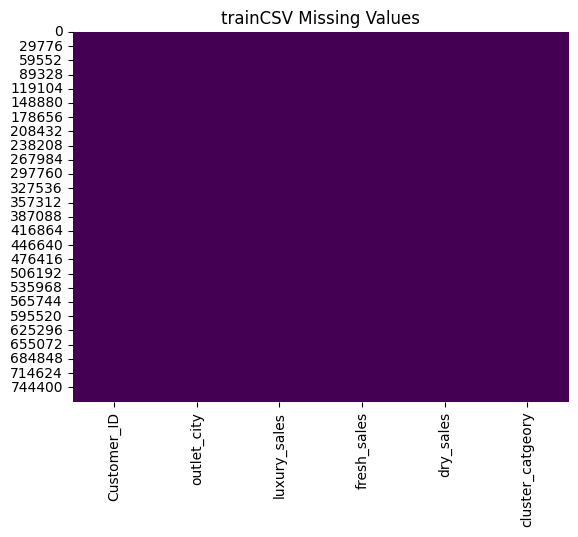

In [21]:
#Heatmap to identify  missing values in traincsv dataframe
sns.heatmap(traindf.isnull(),cbar=False,cmap='viridis')
plt.title('trainCSV Missing Values')

the missing values are not identifirable, because there is a large set of data in this dataset

Univariate Analysis

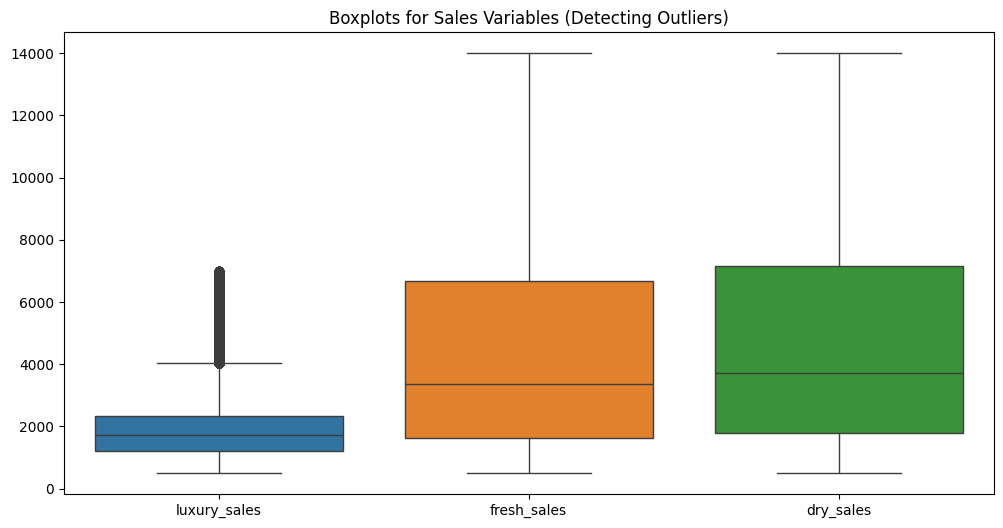

In [22]:
#Boxplots to Identify Outliers for sales columns

plt.figure(figsize=(12,6))
sns.boxplot(data=traindf[['luxury_sales', 'fresh_sales', 'dry_sales']])
plt.title("Boxplots for Sales Variables (Detecting Outliers)")
plt.show()

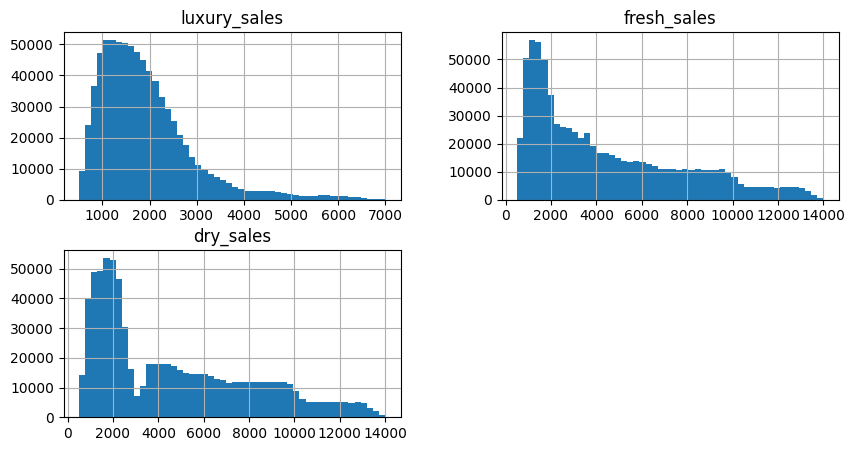

In [23]:
#identifying the distribution of sales through histogram
traindf[['luxury_sales', 'fresh_sales', 'dry_sales']].hist(figsize=(10,5), bins=50)
plt.show()

Bivariate Analysis

Text(0.5, 1.0, 'Bivariate analysis of outlet city and luxury sales')

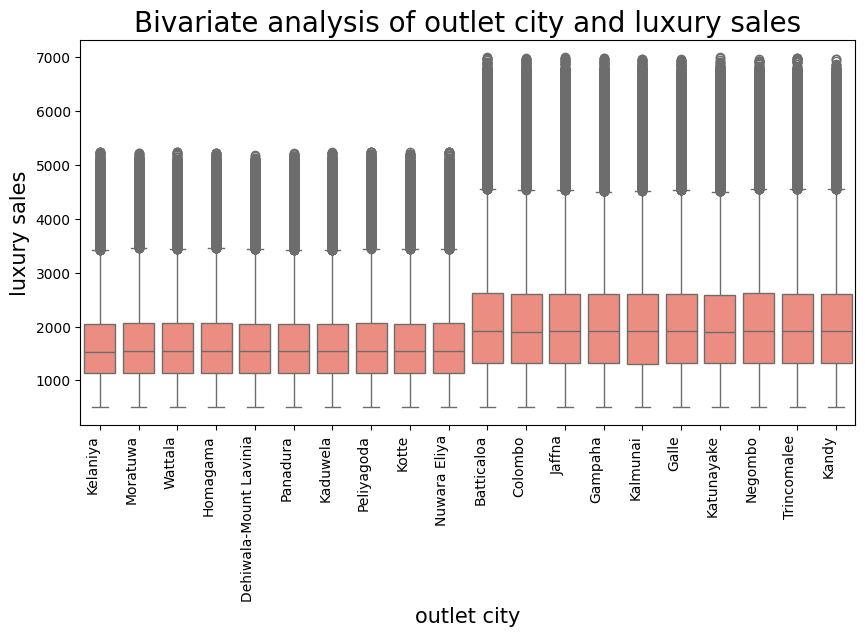

In [24]:
plt.figure(figsize= (10,5))
ax = sns.boxplot( data = traindf, x= traindf['outlet_city'] , y= traindf["luxury_sales"], color= '#fd7f6f')
plt.xticks(rotation=90, ha='right')
ax.set_xlabel('outlet city',fontsize = 15)
ax.set_ylabel('luxury sales', fontsize = 15)
ax.set_title('Bivariate analysis of outlet city and luxury sales', fontsize= 20)

Text(0.5, 1.0, 'Bivariate analysis of outlet city and fresh sales')

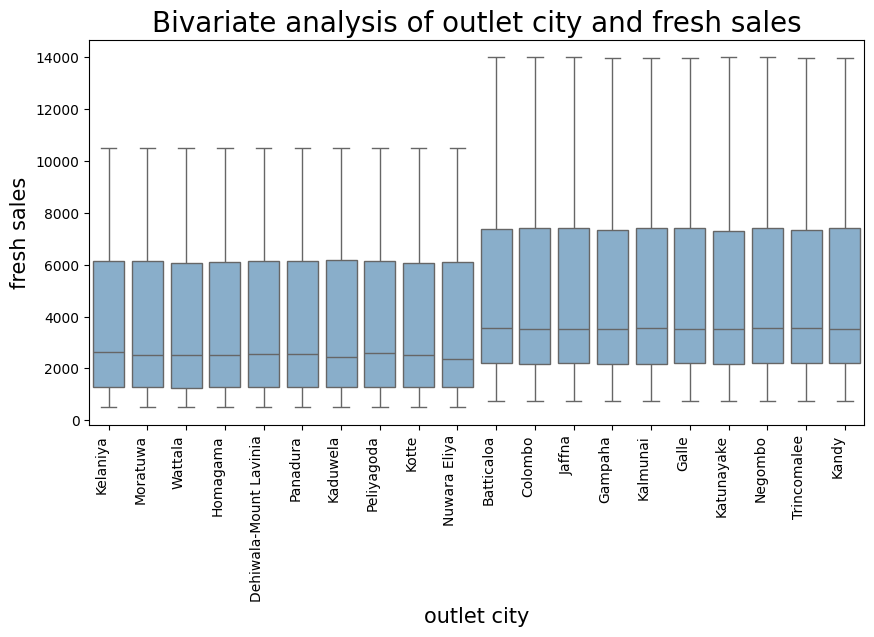

In [25]:
plt.figure(figsize= (10,5))
ax = sns.boxplot( data = traindf, x= traindf['outlet_city'] , y= traindf["fresh_sales"], color= '#7eb0d5')
plt.xticks(rotation=90, ha='right')
ax.set_xlabel('outlet city',fontsize = 15)
ax.set_ylabel('fresh sales', fontsize = 15)
ax.set_title('Bivariate analysis of outlet city and fresh sales', fontsize= 20)

Multivariate analysis

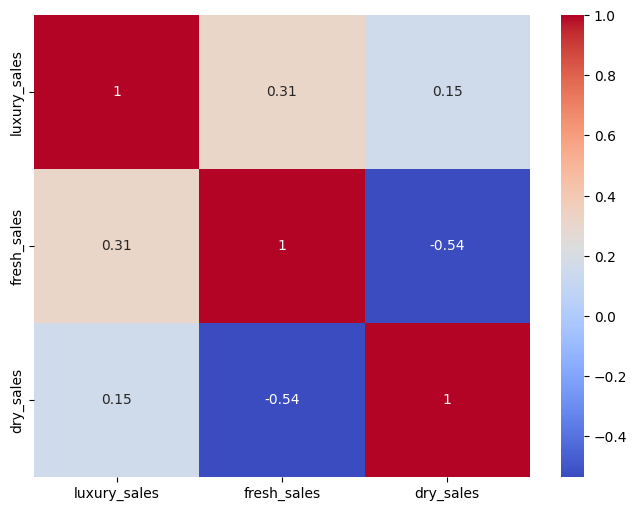

In [26]:
#correlation matrix between the numeric values
plt.figure(figsize=(8,6))
sns.heatmap(traindf[['luxury_sales', 'fresh_sales', 'dry_sales']].corr(), annot=True, cmap="coolwarm")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


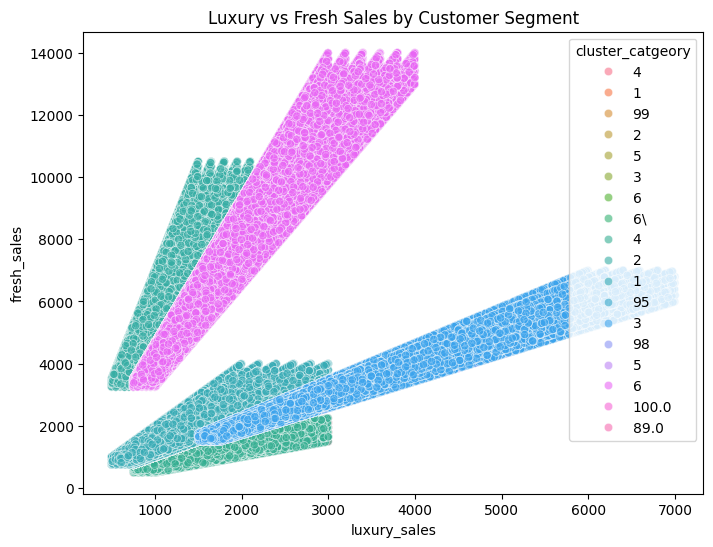

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=traindf, x='luxury_sales', y='fresh_sales', hue='cluster_catgeory', alpha=0.6)
plt.title("Luxury vs Fresh Sales by Customer Segment")
plt.show()

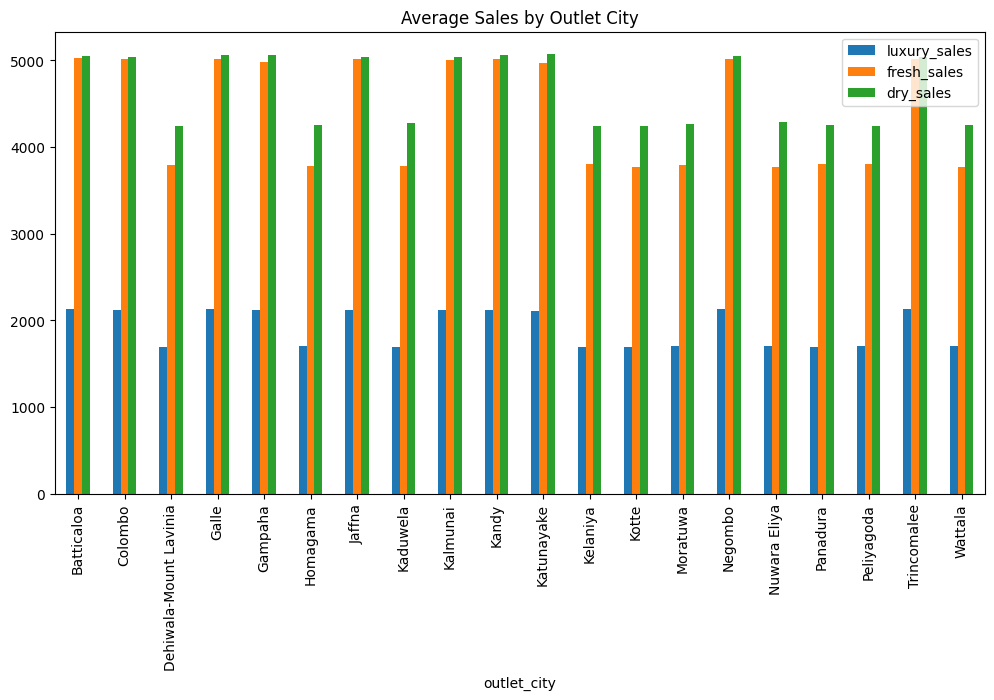

In [28]:
#outlet city wise sales distribution
traindf.groupby("outlet_city")[['luxury_sales', 'fresh_sales', 'dry_sales']].mean().plot(kind="bar", figsize=(12,6))
plt.title("Average Sales by Outlet City")
plt.show()

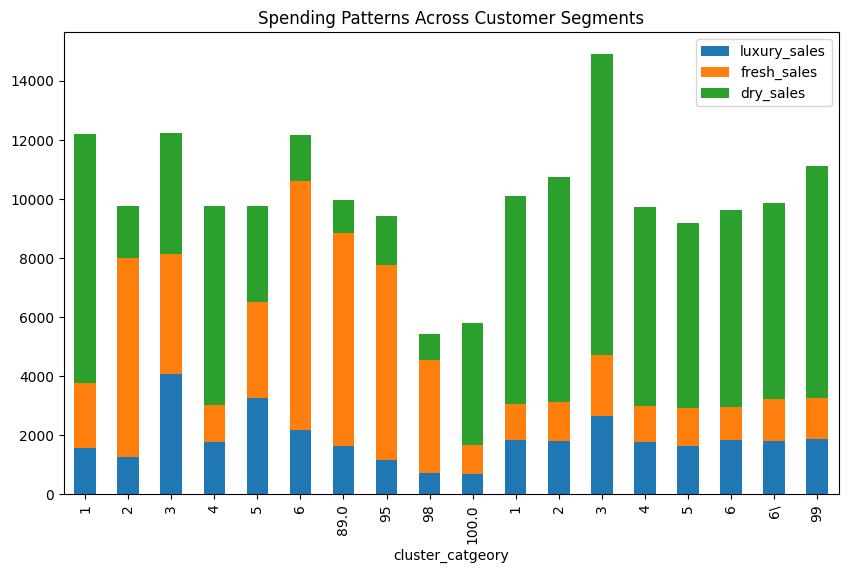

In [29]:
#spending distributions by cluster
traindf.groupby("cluster_catgeory")[['luxury_sales', 'fresh_sales', 'dry_sales']].mean().plot(
    kind="bar", stacked=True, figsize=(10,6)
)
plt.title("Spending Patterns Across Customer Segments")
plt.show()

Data pre processing

In [30]:
#renaming and fixing the misspeliling in cluster category column
traindf = traindf.rename(columns={'cluster_catgeory': 'cluster_category'})

traindf.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [31]:
# Identify all duplicate rows in traincsv dataset
duplicate_rows = traindf[traindf.duplicated(keep=False)]
print(f"Total Duplicates: {len(duplicate_rows)}")

Total Duplicates: 0


there are no duplicate values in the traincsv dataframe

In [32]:
#check for datapoints in the dataframe
datapoints = len(traindf)
datapoints

774155

In [33]:
#statistical view for each numerical column
traindf.describe()

,Customer_ID,luxury_sales,fresh_sales,dry_sales
count,7.741530e+05,774110.000000,774105.000000,774117.000000
mean,1.038708e+07,1921.965255,4428.680047,4676.280399
std,2.234795e+05,1004.078513,3334.654673,3409.386733
min,1.000000e+07,500.000000,500.000000,500.000000
25%,1.019354e+07,1213.530000,1620.190000,1787.940000
50%,1.038708e+07,1715.280000,3356.480000,3727.760000
75%,1.058062e+07,2338.697500,6671.610000,7162.200000
max,1.077415e+07,6999.650000,13997.900000,13999.300000


In [34]:
#to identify no of rows and no of column in the dataset
traindf.shape

(774155, 6)

Handling the missing values in traindf dataset

In [35]:
#missing values in the traincsv
traincsv_missingvalues = traindf.isnull().sum()
traincsv_missingvalues

,0
Customer_ID,2
outlet_city,2
luxury_sales,45
fresh_sales,50
dry_sales,38
cluster_category,1


In [36]:
#Handling the missing values in sales columns using median
traindf['luxury_sales'] = traindf['luxury_sales'].fillna(traindf['luxury_sales'].median())
traindf['fresh_sales'] = traindf['fresh_sales'].fillna(traindf['fresh_sales'].median())
traindf['dry_sales'] = traindf['dry_sales'].fillna(traindf['dry_sales'].median())

In [37]:
#missing values in the traincsv dataframe after filling sales values
traincsv_missingvalues = traindf.isnull().sum()
traincsv_missingvalues

,0
Customer_ID,2
outlet_city,2
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_category,1


In [38]:
#removing the missing value rows in customer id
traindf.dropna(subset=['Customer_ID'], inplace=True)

In [39]:
#removing the missing value rows in cluster categegory
traindf.dropna(subset=['cluster_category'], inplace=True)

In [40]:
#customer id 3560 removing blacklash in cluster category from '6\' to  '6'
traindf.loc[3560 ,"cluster_category"] = 6

In [41]:
#results after removing blacklash in cluster category value
converted_txt_values = [3560]
traindf.loc[converted_txt_values]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category
3560,10604532.0,Dehiwala-Mount Lavinia,1811.34,1408.82,6641.58,6


In [42]:
#removing rows which has value more than 6 in cluster category
values_to_remove = [99, 95, 98, 100.0, 89.0]

traindf = traindf[~traindf['cluster_category'].isin(values_to_remove)]

In [43]:
traindf = traindf[traindf['cluster_category'] != '99']

In [44]:
unique_values = traindf['cluster_category'].unique()
print(unique_values)

['4' '1' '2' '5' '3' '6' 6 4 2 1 3 5]


In [45]:
#Calculating the mode of outlet_city (most frequnt no used in outlet_City column)
outlet_city_mode = traindf['outlet_city'].mode()[0]

# Filling missing values in outlet_city with the mode
traindf['outlet_city'] = traindf['outlet_city'].fillna(outlet_city_mode)

In [46]:
#overall missing values in the traincsv dataframe after filling and removing
traincsv_missingvalues = traindf.isnull().sum()
traincsv_missingvalues

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_category,0


EDA After pre data rpocessing

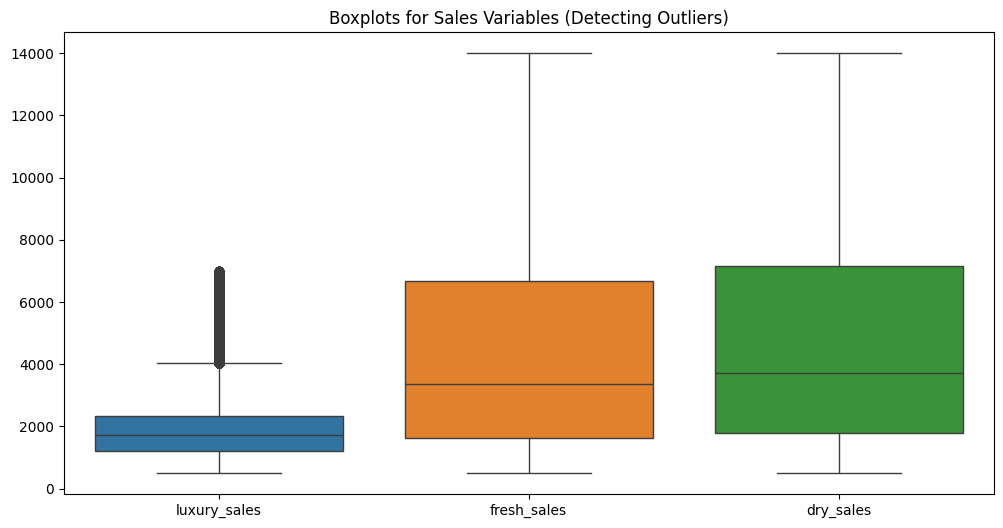

In [47]:
#Boxplots to Identify Outliers in sales columns

plt.figure(figsize=(12,6))
sns.boxplot(data=traindf[['luxury_sales', 'fresh_sales', 'dry_sales']])
plt.title("Boxplots for Sales Variables (Detecting Outliers)")
plt.show()

In [48]:
#removing outliers in sales coloumns
for column in ['luxury_sales', 'fresh_sales', 'dry_sales']:
    Q1 = traindf[column].quantile(0.25)
    Q3 = traindf[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    traindf = traindf[(traindf[column] >= lower_bound) & (traindf[column] <= upper_bound)]

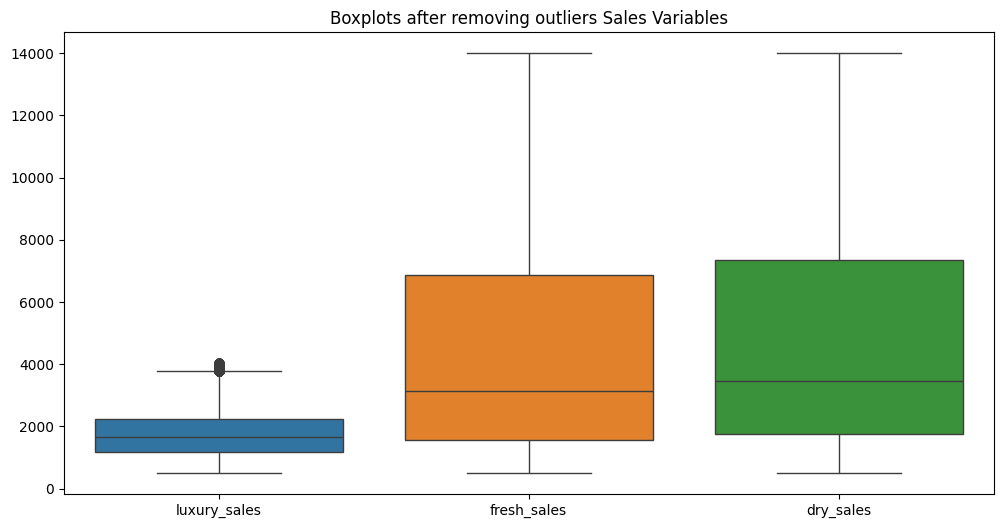

In [49]:
#Boxplots after removing  Outliers in sales columns

plt.figure(figsize=(12,6))
sns.boxplot(data=traindf[['luxury_sales', 'fresh_sales', 'dry_sales']])
plt.title("Boxplots after removing outliers Sales Variables")
plt.show()

In [50]:
#datapoints after removing outliers
datapoints = len(traindf)
datapoints

739088

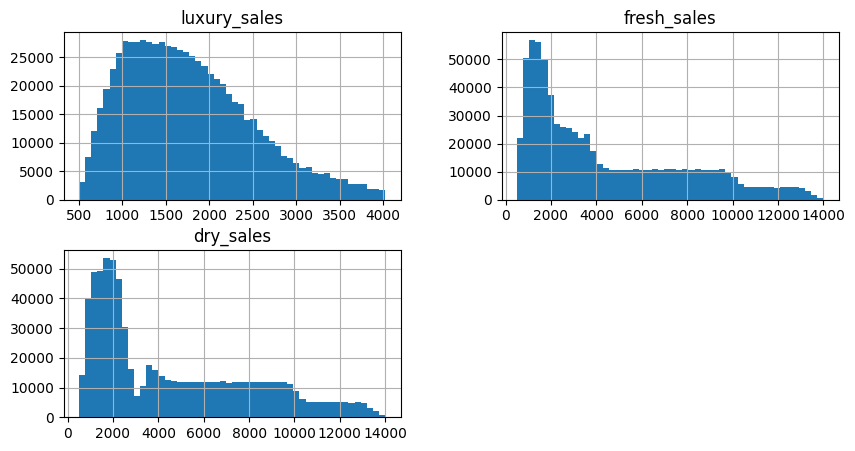

In [51]:
#identifying the distribution of sales through histogram
traindf[['luxury_sales', 'fresh_sales', 'dry_sales']].hist(figsize=(10,5), bins=50)
plt.show()

Bivariate Analysis

Text(0.5, 1.0, 'Bivariate analysis of outlet city and luxury sales')

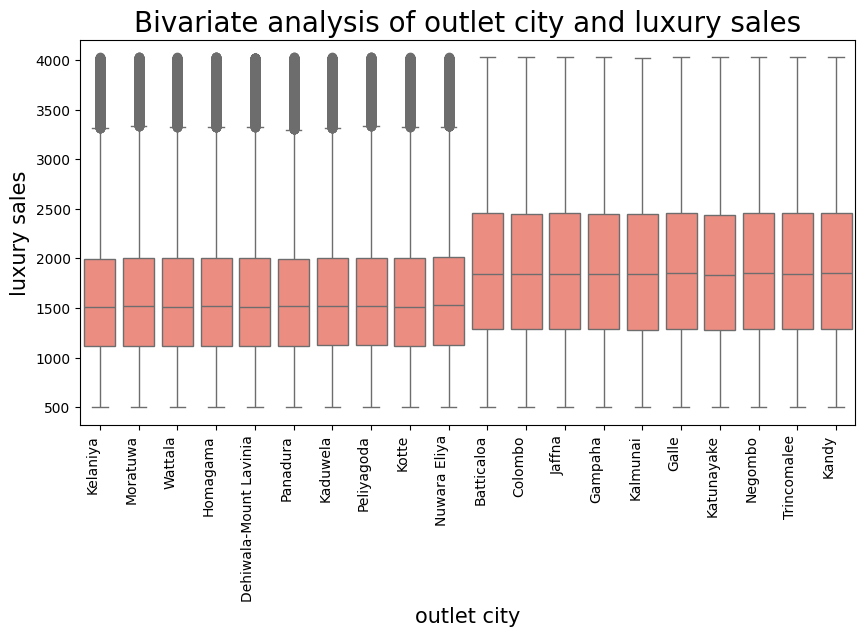

In [52]:
plt.figure(figsize= (10,5))
ax = sns.boxplot( data = traindf, x= traindf['outlet_city'] , y= traindf["luxury_sales"], color= '#fd7f6f')
plt.xticks(rotation=90, ha='right')
ax.set_xlabel('outlet city',fontsize = 15)
ax.set_ylabel('luxury sales', fontsize = 15)
ax.set_title('Bivariate analysis of outlet city and luxury sales', fontsize= 20)

Multivariate Analysis

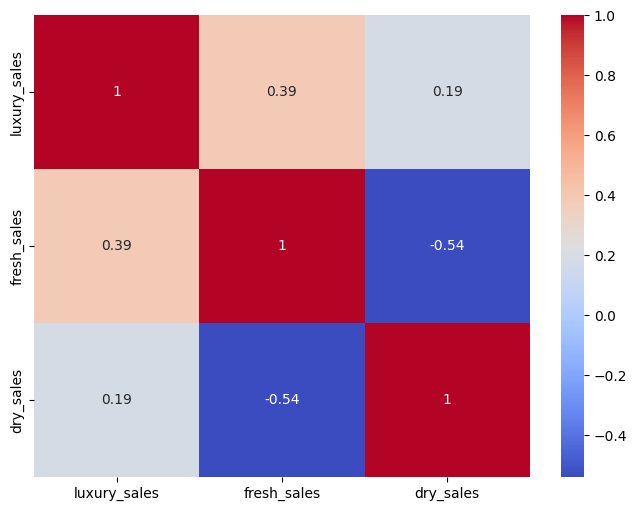

In [53]:
#correlation matrix between the numeric values
plt.figure(figsize=(8,6))
sns.heatmap(traindf[['luxury_sales', 'fresh_sales', 'dry_sales']].corr(), annot=True, cmap="coolwarm")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


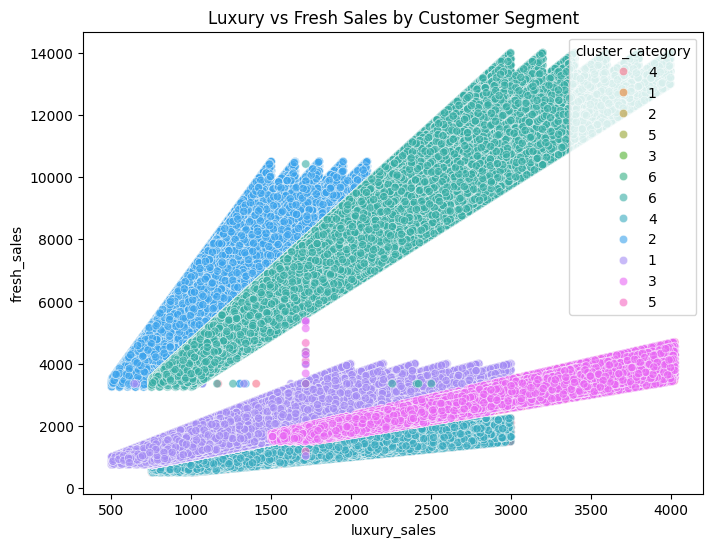

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=traindf, x='luxury_sales', y='fresh_sales', hue='cluster_category', alpha=0.6)
plt.title("Luxury vs Fresh Sales by Customer Segment")
plt.show()

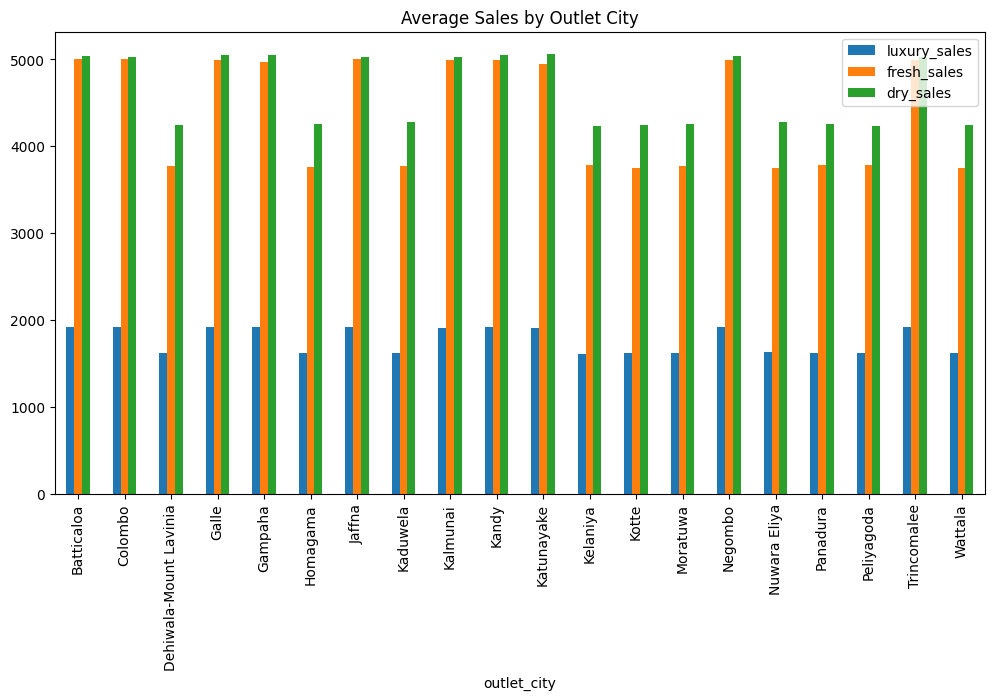

In [55]:
#outlet city wise sales distribution
traindf.groupby("outlet_city")[['luxury_sales', 'fresh_sales', 'dry_sales']].mean().plot(kind="bar", figsize=(12,6))
plt.title("Average Sales by Outlet City")
plt.show()

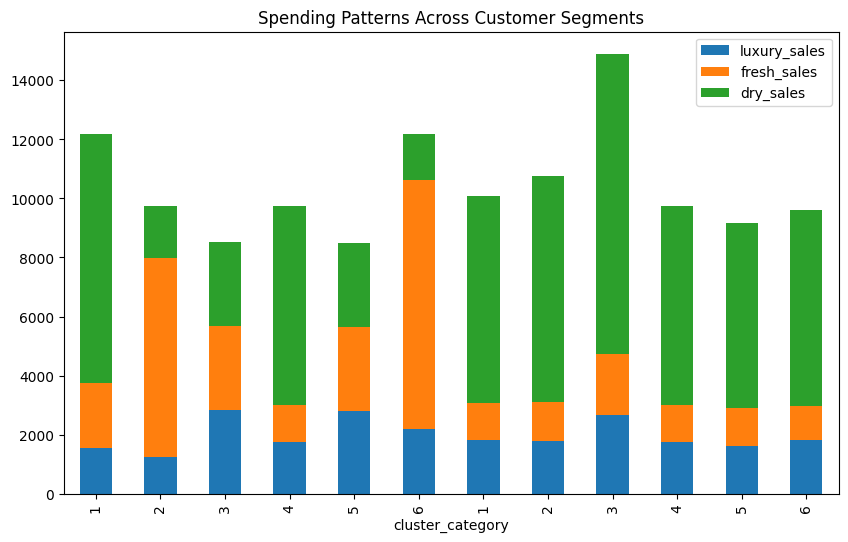

In [56]:
#spending distributions by cluster
traindf.groupby("cluster_category")[['luxury_sales', 'fresh_sales', 'dry_sales']].mean().plot(
    kind="bar", stacked=True, figsize=(10,6)
)
plt.title("Spending Patterns Across Customer Segments")
plt.show()

Feature engineering

In [57]:
traindf['cluster_category'] = traindf['cluster_category'].astype(int)

In [58]:
traindf['cluster_category'] = traindf['cluster_category'].astype('category')

In [59]:
# Check the data type of the 'cluster_category' column
print(traindf['cluster_category'].dtype)

category


Scaling

In [60]:
#Robust scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaled_data = scaler.fit_transform(traindf[['luxury_sales', 'fresh_sales', 'dry_sales']])
# Creating a DataFrame with the scaled data and original column names
scaled_df = pd.DataFrame(scaled_data, columns=['luxury_sales', 'fresh_sales', 'dry_sales'], index=traindf.index)

# Updating the original DataFrame with the scaled values
traindf[['luxury_sales', 'fresh_sales', 'dry_sales']] = scaled_df[['luxury_sales', 'fresh_sales', 'dry_sales']]
traindf.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category
0,10493832.0,Kelaniya,-0.439830,-0.449339,0.324965,4
1,10178643.0,Moratuwa,-0.074139,-0.391966,0.452208,1
2,10513916.0,Wattala,0.597391,-0.312540,1.012410,4
3,10334589.0,Wattala,0.583994,-0.263745,1.002488,4
4,10458365.0,Kelaniya,0.651795,-0.201502,1.028152,4


Modeling

In [61]:
# traindf splitting to train_test_split
from sklearn.model_selection import train_test_split


# Splitting the data
X = traindf[['luxury_sales', 'fresh_sales', 'dry_sales']]  # Features
y = traindf['cluster_category']  # dependant variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
#model training with KNN method
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report

y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9603611648558813


In [64]:
y_train_pred = knn.predict(X_train)

# Calculating accuracy for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9753499007462874


In [65]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     56972
           2       0.99      1.00      1.00     46367
           3       0.45      0.41      0.43      7277
           4       1.00      1.00      1.00     51589
           5       0.54      0.59      0.57      8789
           6       1.00      1.00      1.00     50733

    accuracy                           0.96    221727
   macro avg       0.83      0.83      0.83    221727
weighted avg       0.96      0.96      0.96    221727



In [67]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    132007
           2       1.00      1.00      1.00    108693
           3       0.67      0.61      0.64     16835
           4       1.00      1.00      1.00    120843
           5       0.70      0.75      0.73     20507
           6       1.00      1.00      1.00    118476

    accuracy                           0.98    517361
   macro avg       0.89      0.89      0.89    517361
weighted avg       0.98      0.98      0.98    517361



Confusion Matrix:
[[56755     2     0   212     2     1]
 [    0 46197     0     6     1   163]
 [    0     1  2956     0  4320     0]
 [  205     0     2 51379     2     1]
 [    2     1  3614     3  5168     1]
 [    2   235     4     7     2 50483]]


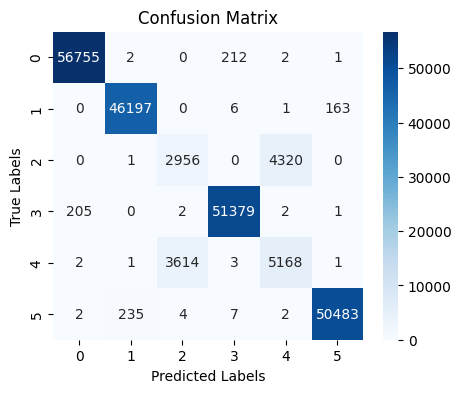

In [68]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

#visualize the confusion matrix using seaborn heatmap

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Confusion Matrix:
[[131597      2      1    398      3      6]
 [     5 108495      3      1      3    186]
 [     3      3  10340      1   6485      3]
 [   231      3      7 120599      1      2]
 [     3      4   5036      7  15450      7]
 [     0    339      5      3      2 118127]]


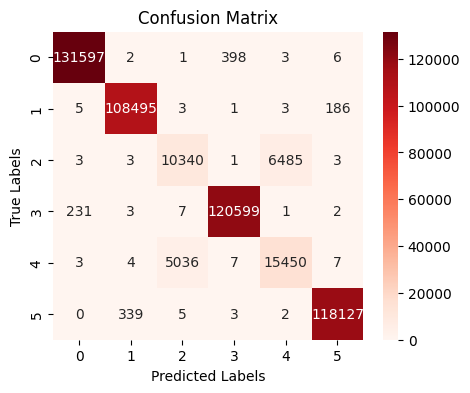

In [69]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

#visualize the confusion matrix using seaborn heatmap

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [70]:
print(y_train.value_counts())
print(y_test.value_counts())

cluster_category
1    132007
4    120843
6    118476
2    108693
5     20507
3     16835
Name: count, dtype: int64
cluster_category
1    56972
4    51589
6    50733
2    46367
5     8789
3     7277
Name: count, dtype: int64
